# Using Machine Learning Models to Predict Stock Returns for Apple


In this project, we will use various Machine Learning models, including Linear Regression, Logistic Regression, Support Vector Machines, ARIMA, and LSTM, to predict whether the stock return of a company will increase or decrease. Our predictions will be based on historical quarterly stock data, the company's fundamental financials, and U.S. economic indicators. We will use quarterly data from 2014 until the end of 2023.

Our approach distinguishes itself from generic methods found online by not focusing on predicting prices or returns for profit. *Instead, we aim to be risk-averse and use ML models to predict whether the return will be positive or negative in the next quarter. Our goal is to invest only if the return is predicted to be positive. This strategy serves as a hedge against inflation, ensuring that we invest in opportunities with positive returns rather than losing money to inflation.*

---

* __Use of Linear Regression:__

> We will learn the model parameters using the training data and then use the model to predict the relative stock return of the company for the next quarter lying in the test data. We will then compare the predicted stock return with the actual stock return to evaluate the model's performance. We will do this iteratively for all the the quarters in the test data to get a sense of the model's performance. Also, If the model's prediction for the relative return is positive and also the actual return is positive, then we will consider the model to be successful (1) - otherwise unsuccessful(0) - and caluclate the accuracy of the model. Apart from Accuracy, we will also calculate the usual evaluation metrics for linear regression models, like Mean Squared Error, Mean Absolute Error, and R^2 Score.

---

* __Use of Logistic Regression:__
> We will learn the model parameters using the training data and then use the model to predict whether the relative stock return of the company will increase or decrease for the next quarter lying in the test data. We will then compare the predicted stock return with the actual stock return to evaluate the model's performance. We will do this iteratively for all the the quarters in the test data to get a sense of the model's performance. If the model's prediction for the stock return is correct, then we will consider the model to be successful (1) and caluclate the accuracy of the model. If the model's prediction for the stock return is incorrect, then we will consider the model to be unsuccessful (0). Apart from Accuracy, we will also calculate the usual evaluation metrics for logistic regression models, like Confusion Matrix, Precision, Recall, F1 Score, and ROC-AUC Score.

---

*__Use of LSTM:__*
> We will learn the model parameters using the training data and then use the model to predict whether the relative stock return of the company will increase or decrease for the next quarter lying in the test data. We will then compare the predicted stock return with the actual stock return to evaluate the model's performance. We will do this iteratively for all the the quarters in the test data to get a sense of the model's performance. If the model's prediction for the stock return is correct, then we will consider the model to be successful (1) and caluclate the accuracy of the model. If the model's prediction for the stock return is incorrect, then we will consider the model to be unsuccessful (0). Apart from Accuracy, we will also calculate the usual evaluation metrics for LSTM models, like Confusion Matrix, Precision, Recall, F1 Score, and ROC-AUC Score.

---
*__Use of ARIMA Model:__*
> Arima Model works by fitting a line to the data and then using the line to make predictions. It is a time series model that is used to predict future values based on the historical data. We will use the ARIMA model to predict the stock return of the company for the next quarter lying in the test data. We will then compare the predicted stock return with the actual stock return to evaluate the model's performance. We will do this iteratively for all the the quarters in the test data to get a sense of the model's performance. We will also calculate the usual evaluation metrics for ARIMA models, like Mean Squared Error, Mean Absolute Error, and R^2 Score.


---

For this project we will use __Yahoo Finance__ and __Alpha Vantage__ to gather the relevant data. We need the following data for each stock:
* The latest stock `closing` price for every *quarter*.
* The Average Volume of stocks traded every *quarter*.
* Quarterly `Dividends` paid by the company.
* Quarterly Reported Earnings Per Share `reportedEPS`.
* Quarterly `Total Revenue`.+
* Quarterly `Net Income`.
* Quarterly `GDP` of the US economy.
* Quarterly `Federal Funds Rate` set by the Federal Reserve Bank of the US.
* Quarterly `Consumer Price Index` (CPI) of the US economy.

Our choice of these features is based on the prevalent and obvious theory that the stock market is influenced by not only the historical stock prices and fundamental company financials, but also the overall economy. The GDP, Federal Funds Rate, and CPI are indicators of the overall health of the economy. The stock price, dividends, and earnings per share are indicators of the confidence of investors in the value generated by the company. The volume of stocks traded is an indicator of the interest of investors in the stock. The net income and total revenue are indicators of the financial health of the company.

Lets begin by loading the relevant libraries and gathering the data.

---

In [1]:
import yfinance as yf # Yahoo Finance for historical stock data and dividends data
import requests
import csv
import pandas as pd
import json

ticker = "AAPL" # Apple Inc. stock ticker
# Start date and end date for historical stock data. We want the data to range from start of 2014 to end of 2023.
start_date = "2013-06-30"
end_date = "2024-03-31"
# This choice of range ensure that we have the desired range of data for the model because we will eventually delete some rows due to computations.
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [2]:
# Selecting the Close column and resampling the data to quarterly frequency and selecting the last (latest) value of each quarter.
close = data["Close"].resample("Q").last()
# Setting the index to the quarter, defining the desired date format, and then renaming the column "AAPL" to "Close". 
close.set_index(close.index.strftime("%Y-%m-%d"), inplace = True) 
close.index.name = "Quarter"
close.rename(columns = {"AAPL": "Close"}, inplace = True)
close.head()

/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_59892/3174782801.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  close = data["Close"].resample("Q").last()


Ticker,Close
Quarter,
2013-09-30,17.026787
2013-12-31,20.036428
2014-03-31,19.169287
2014-06-30,23.232500
2014-09-30,25.187500


In [3]:
print(f"Shape of the dataframe: {close.shape}")

Shape of the dataframe: (43, 1)


In [4]:
# Repeating similar operations for the Volume column.
avg_vol = data["Volume"].resample("Q").mean()
avg_vol.set_index(avg_vol.index.strftime("%Y-%m-%d"), inplace = True)
avg_vol.index.name = "Quarter"
avg_vol.rename(columns = {"AAPL": "Volume"}, inplace = True)
avg_vol.head()

/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_59892/3639102124.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  avg_vol = data["Volume"].resample("Q").mean()


Ticker,Volume
Quarter,
2013-09-30,3.629280e+08
2013-12-31,3.143794e+08
2014-03-31,3.220987e+08
2014-06-30,2.698170e+08
2014-09-30,2.186614e+08


In [5]:
print(f"Shape of the dataframe: {avg_vol.shape}")

Shape of the dataframe: (43, 1)


In [6]:
# Concatenating the two dataframes along the columns axis to get dataframe related to the stock data.
apple_stock_df = pd.concat([close, avg_vol], axis = 1)
apple_stock_df.head(3)

Ticker,Close,Volume
Quarter,,
2013-09-30,17.026787,3.629280e+08
2013-12-31,20.036428,3.143794e+08
2014-03-31,19.169287,3.220987e+08


In [7]:
# get the dividends data for AAPL now and perform similar operations as above
apple_dividends_df = yf.Ticker(ticker).dividends # get the dividends data for AAPL
apple_dividends_df = apple_dividends_df.resample("Q").last() # last recorded dividend of each quarter
apple_dividends_df = apple_dividends_df.to_frame() # convert the series to a dataframe
apple_dividends_df.reset_index(inplace = True) # reset the index
# Masking the data to get the desired range of data.
start_date = "2013-09-30"
mask = (apple_dividends_df["Date"] >= start_date) & (apple_dividends_df["Date"] <= end_date)
apple_dividends_df = apple_dividends_df[mask]
apple_dividends_df.set_index("Date", inplace = True)

/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_59892/3350265209.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  apple_dividends_df = apple_dividends_df.resample("Q").last() # last recorded dividend of each quarter


In [8]:
apple_dividends_df.index = apple_dividends_df.index.strftime("%Y-%m-%d")
apple_dividends_df.head()

,Dividends
Date,
2013-09-30,0.108929
2013-12-31,0.108929
2014-03-31,0.108929
2014-06-30,0.117500
2014-09-30,0.117500


In [9]:
print(f"Shape of the dataframe: {apple_dividends_df.shape}")

Shape of the dataframe: (43, 1)


Until now, we have the data for stock prices, volumne, and dividends. Now, we will get the fundamental financial data for the company and the economic indicators data using Alpha Vantage.

In [10]:
# Define the dictionary of stock tickers for ease.
tickers = {
    "apple": "AAPL",
    "google": "GOOGL",
    "microsoft": "MSFT",
    "tesla": "TSLA",
    "nvidia": "NVDA"
}
# API key for Alpha Vantage
api = "S3NWX7VJBO74RG2L"
# Define the URLs for the API calls - url for earnings data and url for income statement data.
url_earnings = f"https://www.alphavantage.co/query?function=EARNINGS&symbol={tickers['apple']}&apikey={api}"
url_income_statement = f"https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={tickers['apple']}&apikey={api}"


In [11]:
request = requests.get(url_earnings) # a json file
data = request.json() # convert the json file to a dictionary
with open('apple_earnings.json', 'w') as f:
    json.dump(data, f) # save the dictionary to a json file

In [12]:
with open('apple_earnings.json', 'r') as f:
    earnings_dict = json.load(f) # open the json file and load the dictionary
    
if "quarterlyEarnings" in earnings_dict: # check if the key "quarterlyEarnings" is in the dictionary
    earnings = earnings_dict["quarterlyEarnings"]
    apple_earnings_df = pd.DataFrame(earnings) # convert the dictionary of quarterly earnings to a dataframe
else:
    print("No earnings data found.") # if the key is not found, print this message

In [13]:
apple_earnings_df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime
0,2024-09-30,2024-10-31,1.64,1.6,0.04,2.5,post-market
1,2024-06-30,2024-08-01,1.4,1.35,0.05,3.7037,post-market
2,2024-03-31,2024-05-02,1.53,1.5,0.03,2,post-market
3,2023-12-31,2024-02-01,2.18,2.1,0.08,3.8095,post-market
4,2023-09-30,2023-11-02,1.46,1.39,0.07,5.036,post-market


In [14]:
apple_earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fiscalDateEnding    115 non-null    object
 1   reportedDate        115 non-null    object
 2   reportedEPS         115 non-null    object
 3   estimatedEPS        115 non-null    object
 4   surprise            115 non-null    object
 5   surprisePercentage  115 non-null    object
 6   reportTime          115 non-null    object
dtypes: object(7)
memory usage: 6.4+ KB


In [15]:
# convert the date columns to datetime objects
apple_earnings_df["fiscalDateEnding"] = pd.to_datetime(apple_earnings_df["fiscalDateEnding"])
apple_earnings_df["reportedDate"] = pd.to_datetime(apple_earnings_df["reportedDate"])

In [16]:
# we will only keep fiscalDateEnding and reportedEPS - where reportedEPS is the reported earnings per share
apple_earnings_df = apple_earnings_df[["fiscalDateEnding", "reportedEPS"]]

In [17]:
# Masking the data to get the desired range of data.
mask = (apple_earnings_df["fiscalDateEnding"] >= start_date) & (apple_earnings_df["fiscalDateEnding"] <= end_date)
apple_earnings_df = apple_earnings_df[mask]

In [18]:
# Sorting the data by the fiscalDateEnding column.
apple_earnings_df.sort_values(by = "fiscalDateEnding", inplace = True)

In [19]:
apple_earnings_df.head(3)

,fiscalDateEnding,reportedEPS
44,2013-09-30,0.295
43,2013-12-31,0.5175
42,2014-03-31,0.415


In [20]:
apple_earnings_df.tail(3)

,fiscalDateEnding,reportedEPS
4,2023-09-30,1.46
3,2023-12-31,2.18
2,2024-03-31,1.53


In [21]:
# we will make fiscalDateEnding the index
apple_earnings_df.set_index("fiscalDateEnding", inplace = True)

In [22]:
apple_earnings_df.index = apple_earnings_df.index.strftime("%Y-%m-%d")

In [23]:
apple_earnings_df.shape

(43, 1)

Moving on to the income statements (quarterly) for Apple

In [24]:
# Similar operations for the income statement data.
request = requests.get(url_income_statement)
data = request.json() 
with open('apple_income_statement.json', 'w') as f:
    json.dump(data, f)

In [25]:
with open('apple_income_statement.json', 'r') as f:
    income_statement_dict = json.load(f)
    
if "quarterlyReports" in income_statement_dict: # check if the key "quarterlyReports" is in the dictionary
    income_statement = income_statement_dict["quarterlyReports"] # get the data
    apple_income_statement_df = pd.DataFrame(income_statement)  # convert the dictionary of quarterly income statement to a dataframe
else:
    print("No income statement data found.")

In [26]:
apple_income_statement_df.head()

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2024-09-30,USD,43879000000,94930000000,57574000000,51051000000,29591000000,6523000000,7765000000,14288000000,...,None,2911000000,29610000000,14874000000,None,14736000000,15980000000,29591000000,32502000000,14736000000
1,2024-06-30,USD,39678000000,85777000000,52419000000,46099000000,25352000000,6320000000,8006000000,14326000000,...,None,2850000000,25494000000,4046000000,None,21448000000,21992000000,25352000000,28202000000,21448000000
2,2024-03-31,USD,42271000000,90753000000,54950000000,48482000000,27900000000,6468000000,7903000000,14371000000,...,None,2836000000,28058000000,4422000000,None,23636000000,24054000000,27900000000,30736000000,23636000000
3,2023-12-31,USD,54855000000,119575000000,71506000000,64720000000,40373000000,6786000000,7696000000,14482000000,...,None,2848000000,40323000000,6407000000,None,33916000000,35990000000,40373000000,43221000000,33916000000
4,2023-09-30,USD,40427000000,88496000000,55222000000,49071000000,26969000000,6151000000,7307000000,13458000000,...,None,2653000000,26998000000,4042000000,1002000000,22956000000,23305000000,28000000000,29622000000,22956000000


In [27]:
apple_income_statement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   fiscalDateEnding                   66 non-null     object
 1   reportedCurrency                   66 non-null     object
 2   grossProfit                        66 non-null     object
 3   totalRevenue                       66 non-null     object
 4   costOfRevenue                      66 non-null     object
 5   costofGoodsAndServicesSold         66 non-null     object
 6   operatingIncome                    66 non-null     object
 7   sellingGeneralAndAdministrative    66 non-null     object
 8   researchAndDevelopment             66 non-null     object
 9   operatingExpenses                  66 non-null     object
 10  investmentIncomeNet                66 non-null     object
 11  netInterestIncome                  66 non-null     object
 12  interestIn

In [28]:
# convert the date columns to datetime objects
apple_income_statement_df["fiscalDateEnding"] = pd.to_datetime(apple_income_statement_df["fiscalDateEnding"])

In [29]:
# we only need fiscalDateEnding, totalRevenue, netIncome for our analysis
apple_income_statement_df = apple_income_statement_df[["fiscalDateEnding", "totalRevenue", "netIncome"]]
# Masking the data to get the desired range of data.
mask = (apple_income_statement_df["fiscalDateEnding"] >= start_date) & (apple_income_statement_df["fiscalDateEnding"] <= end_date)
apple_income_statement_df = apple_income_statement_df[mask]

In [30]:
apple_income_statement_df.sort_values(by = "fiscalDateEnding", inplace = True)

In [31]:
apple_income_statement_df.head(3)

,fiscalDateEnding,totalRevenue,netIncome
44,2013-09-30,37472000000,7512000000
43,2013-12-31,57510000000,13072000000
42,2014-03-31,45561000000,10223000000


In [32]:
apple_income_statement_df.tail(3)

,fiscalDateEnding,totalRevenue,netIncome
4,2023-09-30,88496000000,22956000000
3,2023-12-31,119575000000,33916000000
2,2024-03-31,90753000000,23636000000


In [33]:
apple_income_statement_df.shape

(43, 3)

In [34]:
apple_income_statement_df.set_index("fiscalDateEnding", inplace = True)

In [35]:
apple_income_statement_df.index = apple_income_statement_df.index.strftime("%Y-%m-%d")

Now, it is time to merge all the company specific data!

In [36]:
# merge all datasets into one dataframe - apple_df. concat along the columns axis.
apple_df = pd.concat([apple_stock_df, apple_earnings_df, apple_income_statement_df, apple_dividends_df], axis = 1)
apple_df.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends
2013-09-30,17.026787,3.629280e+08,0.295,37472000000,7512000000,0.108929
2013-12-31,20.036428,3.143794e+08,0.5175,57510000000,13072000000,0.108929
2014-03-31,19.169287,3.220987e+08,0.415,45561000000,10223000000,0.108929
2014-06-30,23.232500,2.698170e+08,0.32,37332000000,7748000000,0.117500
2014-09-30,25.187500,2.186614e+08,0.355,42123000000,8467000000,0.117500


In [37]:
# we will now make the datatypes to numeric (float) all together
apple_df = apple_df.astype(float)

In [38]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2013-09-30 to 2024-03-31
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         43 non-null     float64
 1   Volume        43 non-null     float64
 2   reportedEPS   43 non-null     float64
 3   totalRevenue  43 non-null     float64
 4   netIncome     43 non-null     float64
 5   Dividends     43 non-null     float64
dtypes: float64(6)
memory usage: 2.4+ KB


Now, we will consider adding the relevant economic data for our time period to enhance the predictions. 

In [39]:
# Url to retrieve the Real GDP data from Alpha Vantage.
url_gdp = f'https://www.alphavantage.co/query?function=REAL_GDP&interval=quarterly&apikey={api}&datatype=csv'
data = requests.get(url_gdp)
with open('gdp.csv', 'w') as f:
    f.write(data.text)

In [40]:
with open('gdp.csv', 'r') as f: # open the saved csv file
    gdp_df = pd.read_csv(f)
# convert the timestamp column to datetime objects
gdp_df["timestamp"] = pd.to_datetime(gdp_df["timestamp"])

In [41]:
gdp_df.head(3)

,timestamp,value
0,2024-07-01,5866.670
1,2024-04-01,5817.169
2,2024-01-01,5638.455


The timestamp column is different from the timestamps we are dealing with. It is one day more than our timestamp. Simply adjust it by substracting one day!

In [42]:
gdp_df["timestamp"] = gdp_df["timestamp"] - pd.Timedelta(days = 1)

In [43]:
# Masking the data to get the desired range of data.
mask = (gdp_df["timestamp"] >= start_date) & (gdp_df["timestamp"] <= end_date)
gdp_df = gdp_df[mask]

In [44]:
gdp_df.sort_values(by = "timestamp", inplace = True)
gdp_df.set_index("timestamp", inplace = True)
gdp_df.index = gdp_df.index.strftime("%Y-%m-%d")
print(f"Shape of gdp_df: {gdp_df.shape}")
gdp_df.rename(columns = {"value": "GDP"}, inplace = True)
gdp_df.head()

Shape of gdp_df: (43, 1)


,GDP
timestamp,
2013-09-30,4586.321
2013-12-31,4403.178
2014-03-31,4532.342
2014-06-30,4616.610
2014-09-30,4709.584


We will now retrive the Dederal Funds Rate (monthly) data:

In [45]:
url_fed_funds = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey={api}&datatype=csv'
data = requests.get(url_fed_funds)
with open('fed_funds.csv', 'w') as f:
    f.write(data.text)

In [46]:
with open('fed_funds.csv', 'r') as f:
    fed_funds_df = pd.read_csv(f) # open the saved csv file
fed_funds_df.head()

,timestamp,value
0,2024-11-01,4.64
1,2024-10-01,4.83
2,2024-09-01,5.13
3,2024-08-01,5.33
4,2024-07-01,5.33


In [47]:
# convert the timestamp column to datetime objects
fed_funds_df["timestamp"] = pd.to_datetime(fed_funds_df["timestamp"])

In [48]:
# make timestamp the index and take the average interest rate per quarter
fed_funds_df.set_index("timestamp", inplace = True)
fed_funds_df = fed_funds_df.resample("Q").mean()

/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_59892/2126813508.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fed_funds_df = fed_funds_df.resample("Q").mean()


In [49]:
# Masking the data to get the desired range of data.
mask = (fed_funds_df.index >= start_date) & (fed_funds_df.index <= end_date)
fed_funds_df = fed_funds_df[mask]

In [50]:
fed_funds_df.sort_values(by = "timestamp", inplace = True)
print(f"Shape of fed_funds_df: {fed_funds_df.shape}")
fed_funds_df.index = fed_funds_df.index.strftime("%Y-%m-%d")
fed_funds_df.rename(columns = {"value": "Fed_Funds_Rate"}, inplace = True)
fed_funds_df.head()

Shape of fed_funds_df: (43, 1)


,Fed_Funds_Rate
timestamp,
2013-09-30,0.083333
2013-12-31,0.086667
2014-03-31,0.073333
2014-06-30,0.093333
2014-09-30,0.090000


Finally, we will get the CPI data from Alpha Vantage

In [51]:
# Url to retrieve the Consumer Price Index (CPI) data from Alpha Vantage.
url_cpi = f'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={api}&datatype=csv'
data = requests.get(url_cpi)
with open('monthly_cpi.csv', 'w') as f:
    f.write(data.text)

In [52]:
with open('monthly_cpi.csv', 'r') as f:
    cpi_df = pd.read_csv(f) # open the saved csv file
cpi_df.head(3)

,timestamp,value
0,2024-11-01,315.493
1,2024-10-01,315.664
2,2024-09-01,315.301


In [53]:
# Performing similar operations as before.
cpi_df["timestamp"] = pd.to_datetime(cpi_df["timestamp"])
cpi_df.set_index("timestamp", inplace = True)
cpi_df.sort_values(by = "timestamp", inplace = True)
cpi_df = cpi_df.resample("Q").mean() # resampling the data to quarterly frequency and taking the mean of each quarter.
# Masking the data to get the desired range of data.
mask = (cpi_df.index >= start_date) & (cpi_df.index <= end_date)
cpi_df = cpi_df[mask]
print(f"Shape of the dataframe: {cpi_df.shape}")
cpi_df.index = cpi_df.index.strftime("%Y-%m-%d")
cpi_df.rename(columns = {"value": "CPI"}, inplace = True)
cpi_df.head(3)

Shape of the dataframe: (43, 1)


/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_59892/882819905.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cpi_df = cpi_df.resample("Q").mean() # resampling the data to quarterly frequency and taking the mean of each quarter.


,CPI
timestamp,
2013-09-30,233.874000
2013-12-31,233.221333
2014-03-31,234.996667


In [54]:
# merge all of them into one dataframe with the name: economic_df
economic_df = pd.concat([gdp_df, fed_funds_df, cpi_df], axis = 1)
economic_df.head()

,GDP,Fed_Funds_Rate,CPI
timestamp,,,
2013-09-30,4586.321,0.083333,233.874000
2013-12-31,4403.178,0.086667,233.221333
2014-03-31,4532.342,0.073333,234.996667
2014-06-30,4616.610,0.093333,237.771667
2014-09-30,4709.584,0.090000,238.044333


Ultimately, we are ready to merge the company specific data, stored in `apple_df`, with the economic data, stored in `economic_df`. All data is quarterly in nature!

In [55]:
# merge the economic_df with the apple_df
apple_df = pd.concat([apple_df, economic_df], axis = 1)

In [56]:
apple_df.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI
2013-09-30,17.026787,3.629280e+08,0.2950,3.747200e+10,7.512000e+09,0.108929,4586.321,0.083333,233.874000
2013-12-31,20.036428,3.143794e+08,0.5175,5.751000e+10,1.307200e+10,0.108929,4403.178,0.086667,233.221333
2014-03-31,19.169287,3.220987e+08,0.4150,4.556100e+10,1.022300e+10,0.108929,4532.342,0.073333,234.996667
2014-06-30,23.232500,2.698170e+08,0.3200,3.733200e+10,7.748000e+09,0.117500,4616.610,0.093333,237.771667
2014-09-30,25.187500,2.186614e+08,0.3550,4.212300e+10,8.467000e+09,0.117500,4709.584,0.090000,238.044333


# Feature Engineering

What is __Feature Engineering__?
Feature engineering is the process of using domain knowledge to extract features from existing data to further enhance the information and find patters intermingling with our target variable. These features can be used to improve the performance of machine learning algorithms.

Some features, thanks to our domain knowledge, that we have selected are as follows:

1. **Dividend Yield**: The dividend yield is the annual dividend per share divided by the price per share. It is a financial ratio that shows how much a company pays out in dividends each year relative to its stock price - thus affecting the stock price.
2. **Divident Payout Ratio**: The dividend payout ratio is the ratio of the total amount of dividends paid out to shareholders relative to the net income of the company. It is also calculated as the dividend per share divided by the earnings per share.
3. **Price to Earnings Ratio**: The price to earnings ratio (P/E ratio) is the ratio for valuing a company that measures its current share price relative to its per-share earnings. It is also known as the price multiple or the earnings multiple.
4. **Relative close change from the previous quarter**: The relative close change from the previous quarter is the percentage change in the stock price from the previous quarter.
5. **Relative volume change from the previous quarter**: The relative volume change from the previous quarter is the percentage change in the volume of stocks traded from the previous quarter.
6. **Relative GDP change from the previous quarter**: The relative GDP change from the previous quarter is the percentage change in the GDP from the previous quarter.
7. **Relative Federal Funds Rate change from the previous quarter**: The relative Federal Funds Rate change from the previous quarter is the percentage change in the Federal Funds Rate from the previous quarter.
8. **Relative Close change for the next quarter**: The relative Close change for the next quarter is the percentage change in the stock price from the current quarter to the next quarter - `our target variable`.


In [57]:
# Dividend yield = dividends per share / Market value per share * 100
apple_df["Dividend_Yield"] = apple_df["Dividends"] / apple_df["Close"] * 100

In [58]:
# dividends per share / earnings per share
apple_df["Dividend_payout"] = apple_df["Dividends"] / apple_df["reportedEPS"]

In [59]:
# Price to Earnings ratio = Market value per share / Earnings per share
apple_df["PE_Ratio"] = apple_df["Close"] / apple_df["reportedEPS"]

In [60]:
apple_df["relative_close_change_from_the_last_quarter"] = apple_df["Close"].pct_change()

In [61]:
apple_df["relative_volume_change_from_the_last_quarter"] = apple_df["Volume"].pct_change()
apple_df["relative_gdp_change_from_the_last_quarter"] = apple_df["GDP"].pct_change()
apple_df["relative_interest_change_from_the_last_quarter"] = apple_df["Fed_Funds_Rate"].pct_change()

In [62]:
apple_df["relative_close_change_for_next_quarter"] = apple_df["relative_close_change_from_the_last_quarter"].shift(-1)

In [63]:
apple_df.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,Dividend_Yield,Dividend_payout,PE_Ratio,relative_close_change_from_the_last_quarter,relative_volume_change_from_the_last_quarter,relative_gdp_change_from_the_last_quarter,relative_interest_change_from_the_last_quarter,relative_close_change_for_next_quarter
2013-09-30,17.026787,3.629280e+08,0.2950,3.747200e+10,7.512000e+09,0.108929,4586.321,0.083333,233.874000,0.639751,0.369251,57.717921,NaN,NaN,NaN,NaN,0.176759
2013-12-31,20.036428,3.143794e+08,0.5175,5.751000e+10,1.307200e+10,0.108929,4403.178,0.086667,233.221333,0.543655,0.210491,38.717736,0.176759,-0.133769,-0.039932,0.040000,-0.043278
2014-03-31,19.169287,3.220987e+08,0.4150,4.556100e+10,1.022300e+10,0.108929,4532.342,0.073333,234.996667,0.568248,0.262480,46.191052,-0.043278,0.024554,0.029334,-0.153846,0.211965
2014-06-30,23.232500,2.698170e+08,0.3200,3.733200e+10,7.748000e+09,0.117500,4616.610,0.093333,237.771667,0.505757,0.367187,72.601563,0.211965,-0.162316,0.018593,0.272727,0.084149
2014-09-30,25.187500,2.186614e+08,0.3550,4.212300e+10,8.467000e+09,0.117500,4709.584,0.090000,238.044333,0.466501,0.330986,70.950704,0.084149,-0.189593,0.020139,-0.035714,0.095583


In [64]:
# We will drop the rows with missing values.
apple_df.dropna(inplace = True)

In [65]:
apple_df.head(2)

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,Dividend_Yield,Dividend_payout,PE_Ratio,relative_close_change_from_the_last_quarter,relative_volume_change_from_the_last_quarter,relative_gdp_change_from_the_last_quarter,relative_interest_change_from_the_last_quarter,relative_close_change_for_next_quarter
2013-12-31,20.036428,3.143794e+08,0.5175,5.751000e+10,1.307200e+10,0.108929,4403.178,0.086667,233.221333,0.543655,0.210491,38.717736,0.176759,-0.133769,-0.039932,0.040000,-0.043278
2014-03-31,19.169287,3.220987e+08,0.4150,4.556100e+10,1.022300e+10,0.108929,4532.342,0.073333,234.996667,0.568248,0.262480,46.191052,-0.043278,0.024554,0.029334,-0.153846,0.211965


In [66]:
apple_df.tail(2)

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,Dividend_Yield,Dividend_payout,PE_Ratio,relative_close_change_from_the_last_quarter,relative_volume_change_from_the_last_quarter,relative_gdp_change_from_the_last_quarter,relative_interest_change_from_the_last_quarter,relative_close_change_for_next_quarter
2023-09-30,171.210007,5.803321e+07,1.46,8.849600e+10,2.295600e+10,0.24,5831.583,5.26,306.835333,0.140179,0.164384,117.267128,-0.117338,0.015837,0.018786,0.054108,0.124525
2023-12-31,192.529999,5.293779e+07,2.18,1.195750e+11,3.391600e+10,0.24,5638.455,5.33,307.156000,0.124656,0.110092,88.316513,0.124525,-0.087802,-0.033118,0.013308,-0.109334


In [67]:
# Save the final dataframe to a csv file for reuse.
apple_df.to_csv("apple_df.csv")

# EDA

In [108]:
apple_df = pd.read_csv("apple_df.csv")
apple_df["Unnamed: 0"] = pd.to_datetime(apple_df["Unnamed: 0"])
apple_df.set_index("Unnamed: 0", inplace = True)
apple_df.index.name = "Quarter"

In [109]:
apple_df.describe()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,Dividend_Yield,Dividend_payout,PE_Ratio,relative_close_change_from_the_last_quarter,relative_volume_change_from_the_last_quarter,relative_gdp_change_from_the_last_quarter,relative_interest_change_from_the_last_quarter,relative_close_change_for_next_quarter
count,41.000000,4.100000e+01,41.000000,4.100000e+01,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,77.724042,1.411325e+08,0.915244,7.098351e+10,1.669595e+10,0.176777,5093.449805,1.248130,258.642626,0.329773,0.229774,79.745352,0.071773,-0.023370,0.005549,0.290415,0.064795
std,57.895454,6.662595e+07,0.501404,2.272415e+10,7.194130e+09,0.042808,374.189191,1.545590,22.831284,0.149553,0.081728,31.165462,0.151461,0.234780,0.031885,0.920387,0.153084
min,19.169287,5.293779e+07,0.320000,3.733200e+10,7.748000e+09,0.108929,4403.178000,0.060000,233.221333,0.123730,0.104762,32.091464,-0.301231,-0.331249,-0.056260,-0.952381,-0.301231
25%,28.955000,9.543165e+07,0.517500,5.289600e+10,1.102900e+10,0.142500,4783.855000,0.093333,240.169333,0.167826,0.161954,58.729999,-0.016670,-0.163313,-0.031256,-0.002774,-0.043278
50%,47.487499,1.134222e+08,0.730000,6.404000e+10,1.382200e+10,0.182500,5069.624000,0.450000,252.197000,0.375492,0.210491,74.454104,0.084149,-0.069828,0.014140,0.107486,0.070129
75%,132.690002,1.740667e+08,1.260000,8.829300e+10,2.072100e+10,0.220000,5360.970000,1.923333,269.315000,0.462787,0.294355,99.332029,0.176759,0.030378,0.027544,0.236314,0.176289
max,193.970001,3.220987e+08,2.180000,1.232510e+11,3.463000e+10,0.240000,5831.583000,5.330000,307.156000,0.596234,0.401408,158.643832,0.434583,0.908953,0.073387,5.416667,0.434583


---

##### Normalization for better convergence
We will have to normalize the following columns to ensure that the model is not biased towards the columns with higher values. We will use StandardScaler (which assumes that the data is Normally distribued) and makes the features symmetric around 0, which is mathematically advantageous for models that rely on regularization (like ElasticNet). This ensures that all features contribute equally to the model without bias due to their scale or range.

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = apple_df.drop(columns = "relative_close_change_for_next_quarter").columns
apple_df[features] = scaler.fit_transform(apple_df[features])

apple_df.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,Dividend_Yield,Dividend_payout,PE_Ratio,relative_close_change_from_the_last_quarter,relative_volume_change_from_the_last_quarter,relative_gdp_change_from_the_last_quarter,relative_interest_change_from_the_last_quarter,relative_close_change_for_next_quarter
Quarter,,,,,,,,,,,,,,,,,
2013-12-31,-1.008788,2.632595,-0.803115,-0.600282,-0.509995,-1.604624,-1.867630,-0.760805,-1.127273,1.447912,-0.238881,-1.332799,0.701773,-0.476065,-1.444139,-0.275455,-0.043278
2014-03-31,-1.023952,2.749893,-1.010080,-1.132642,-0.910932,-1.604624,-1.518158,-0.769539,-1.048549,1.614397,0.405142,-1.090025,-0.769045,0.206659,0.755256,-0.488686,0.211965
2014-06-30,-0.952898,1.955440,-1.201902,-1.499267,-1.259236,-1.401918,-1.290159,-0.756438,-0.925495,1.191356,1.702239,-0.232069,0.937101,-0.599165,0.414181,-0.019456,0.084149
2014-09-30,-0.918711,1.178100,-1.131230,-1.285814,-1.158052,-1.401918,-1.038604,-0.758621,-0.913404,0.925608,1.253782,-0.285698,0.082732,-0.716792,0.463283,-0.358741,0.095583
2014-12-31,-0.876611,0.946082,-0.303369,0.155243,0.186895,-1.401918,-1.436883,-0.752071,-0.998204,0.650086,-0.943696,-1.418750,0.159159,-0.200338,-1.168641,-0.197233,0.127288


In [111]:
apple_df.describe()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,Dividend_Yield,Dividend_payout,PE_Ratio,relative_close_change_from_the_last_quarter,relative_volume_change_from_the_last_quarter,relative_gdp_change_from_the_last_quarter,relative_interest_change_from_the_last_quarter,relative_close_change_for_next_quarter
count,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,41.000000
mean,1.191459e-16,1.787188e-16,1.841346e-16,1.191459e-16,-7.582011e-17,2.707861e-17,2.512895e-15,8.665155e-17,-7.582011e-16,-2.166289e-16,-5.632351e-16,6.769653e-18,7.852797e-17,1.624717e-17,-5.415722e-18,8.123583e-18,0.064795
std,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,0.153084
min,-1.023952e+00,-1.340174e+00,-1.201902e+00,-1.499267e+00,-1.259236e+00,-1.604624e+00,-1.867630e+00,-7.782726e-01,-1.127273e+00,-1.394839e+00,-1.548625e+00,-1.548056e+00,-2.493307e+00,-1.327643e+00,-1.962583e+00,-1.367072e+00,-0.301231
25%,-8.528285e-01,-6.944534e-01,-8.031145e-01,-8.058479e-01,-7.975045e-01,-8.106609e-01,-8.376534e-01,-7.564379e-01,-8.191735e-01,-1.096323e+00,-8.401471e-01,-6.826924e-01,-5.911816e-01,-6.034664e-01,-1.168641e+00,-3.225066e-01,-0.043278
50%,-5.287491e-01,-4.210759e-01,-3.740398e-01,-3.093524e-01,-4.044483e-01,1.353499e-01,-6.446415e-02,-5.228070e-01,-2.858227e-01,3.095028e-01,-2.388815e-01,-1.718884e-01,8.273180e-02,-2.003377e-01,2.728127e-01,-2.012214e-01,0.070129
75%,9.611945e-01,5.004558e-01,6.961229e-01,7.711848e-01,5.664411e-01,1.022235e+00,7.238145e-01,4.422851e-01,4.732522e-01,9.004623e-01,8.000054e-01,6.362812e-01,7.017729e-01,2.317744e-01,6.984227e-01,-5.951066e-02,0.176289
max,2.032803e+00,2.749893e+00,2.553764e+00,2.328659e+00,2.523841e+00,1.495241e+00,1.997126e+00,2.673788e+00,2.151261e+00,1.803858e+00,2.126159e+00,2.563050e+00,2.425166e+00,4.020386e+00,2.154058e+00,5.638863e+00,0.434583


---
We can finally move on to the model building phase. However, we have to keep in mind that stock market data is highly volatile and unpredictable due to the presence of many factors that can influence the stock prices and can't be captured by the models - like market sentiment and many other factors related to environmental, micro, and macroeconomic factors that we have not taken into account.   

We initiated this project with quite optimism but quickly learned that the stock market is not as predictable as we thought and in pratice, Machine Learning models are not very effective in predicting stock prices. However, for the sake of learning and practice, we will proceed with the applying some models to the data and evaluate their performance.  

Now, that we have outlined the potential challenges, we have to make a naive benchmark model to compare the performance of the other models. The naive benchmark is often based on the random walk model.

A Random Walk model assumes that the next value of a time series is the current value plus a random fluctuation. It's a simple yet effective baseline model for financial time series like stock prices.

For a stock price series $P_t$:

$$P_{t+1} = P_t + \epsilon_t$$

Where:
* $P_{t+1}$ is the Next value in the series
* $P_t$ is the Current value
* $\epsilon_t$ is the Random noise (assumed to follow a normal distribution with mean 0)

For relative changes: 

$$\Delta P_{t+1} = P_{t+1} - P_t = \epsilon_t$$

This means that The next price $P_{t+1}$ depends only on the current price $P_t$, making the process "memoryless."

In [112]:
import numpy as np
np.random.seed(42)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# our model follows the following structure: prediction = current relative_close_change_from_the_last_quarter + random noise ~ N(0, 0.03)
actuals = apple_df["relative_close_change_for_next_quarter"].values
predictions = apple_df["relative_close_change_from_the_last_quarter"].values + np.random.normal(0, 0.03, len(actuals))


# evaluate the model
rmse = mean_squared_error(actuals, predictions, squared=False)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Accuracy: if the actuals are positive and the predictions are positive,
# or if the actuals are negative and the predictions are negative, then the prediction is correct.
# Count the number of correct predictions
correct_predictions = np.sum(np.sign(actuals) == np.sign(predictions))
total_predictions = len(actuals)
accuracy = correct_predictions / total_predictions

# Print results
print(f"Predictions: {predictions}")
print(f"Actuals: {actuals}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Predictions: [ 0.71667436 -0.77319291  0.9565314   0.12842269  0.15213487  0.36406072
 -0.37865939 -1.26303846 -0.79927412 -0.22661067 -1.31487209  0.72638476
 -0.30871326  1.06959444 -0.51475288 -0.0278539   0.14520075 -0.52760177
  0.18343497  0.9450409  -2.44933741  0.87840274 -0.19726335  0.35729431
  1.58351584 -1.3723856   2.39063663  1.33527623  0.47651607 -1.01947026
  0.31263868 -0.20261108  1.22377028 -0.62291293 -1.90557955 -0.44402254
 -0.87348996  1.26052569  0.65878225 -1.25818189  0.3747752 ]
Actuals: [-0.04327826  0.21196476  0.08414936  0.0955831   0.12728758  0.00803665
 -0.12062503 -0.04569357  0.03543602 -0.1228553   0.18253143  0.0245024
  0.24037303  0.00250592  0.07012908  0.09804049 -0.0085682   0.10329003
  0.21949114 -0.3012315   0.20419672  0.04195842  0.13161885  0.31111306
 -0.13403712  0.43458255  0.26984651  0.14575602 -0.07943327  0.12124441
  0.03314831  0.25491171 -0.01666952 -0.21699788  0.01082501 -0.05984084
  0.26914495  0.17628871 -0.1173377   0.1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Interpreation of the results:

__RMSE__: The RMSE value is 1.03. This value is the square root of the mean squared error. It measures the average of the squares of the errors or deviations. The lower the value, the better the model. In this case, the value is 1.03  

__MAE__: The MAE value is 0.83. This value is the average of the absolute differences between the predicted values and the actual values. The lower the value, the better the model. In this case, the value is 0.83 - this is interpretable in our context and shows that our model is off by 83% on average - which is a lot.  

__R2__: The R2 value is -45.76. This value measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The higher the value, the better the model. In this case, the value shows that the model is not appropriate for the data.  

__Accuracy__: The accuracy value is 0.44. This value measures the proportion of correct predictions. The higher the value, the better the model. In this case, the value is 0.44 - which is really poor

These results serve as a naive baseline for the ML models that we will build.


### Lets Start by building a Linear Regression Model

We will learn the model parameters using the training data and then use the model to predict the relative stock return of the company for the next quarter lying in the test data **iteratively**. We will then compare the predicted stock return with the actual stock return to evaluate the model's performance. 

We will do this iteratively for all the the quarters in the test data to get a sense of the model's performance. Also, If the model's prediction for the relative return is positive and also the actual return is positive, then we will consider the model to be successful (1) - otherwise unsuccessful(0) - and caluclate the accuracy of the model. Apart from Accuracy, we will also calculate the usual evaluation metrics for linear regression models, like Mean Squared Error, Mean Absolute Error, and R^2 Score.

Our target is `relative_close_change_for_next_quarter`. Our set of features are all other columns, like close_price, volume, EPS, lagged values for some columns, and also the economic data!

In [113]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Initialize lists to store metrics
ytrues, ypredicts, rmse, mae = [], [], [], []

# Separate training and testing sets. We will consider the data from 2014 to 2021 as the training set and the data from 2022 to 2023 as the testing set.
training_set = apple_df[apple_df.index < "2021-12-31"]
testing_set = apple_df[apple_df.index >= "2021-12-31"]

# Function to train, predict, and evaluate
def train_and_evaluate(model, train_data, test_data):

    X_train = train_data.drop(columns=["relative_close_change_for_next_quarter"])
    y_train = train_data["relative_close_change_for_next_quarter"]
    X_test = test_data.drop(columns=["relative_close_change_for_next_quarter"])
    y_test = test_data["relative_close_change_for_next_quarter"]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict for the first quarter in the test set
    y_pred = model.predict(X_test.iloc[[0]])
    y_true = y_test.iloc[[0]] # Get the true value for the first quarter in the test set
    ypredicts.append(y_pred[0]) # Store the predicted value for accuracy calculation and r2 score
    ytrues.append(y_true.values[0]) # Store the true value for accuracy calculation and r2 score
    
    # Calculate metrics
    return (
        mean_squared_error(y_true, y_pred),
        mean_absolute_error(y_true, y_pred),
    )

# Rolling training and evaluation
while not testing_set.empty:
    # Train and evaluate for the current step
    rmse_val, mae_val = train_and_evaluate(model, training_set, testing_set)
    
    # Store metrics
    rmse.append(rmse_val)
    mae.append(mae_val)
    
    # Update training and testing sets
    training_set = pd.concat([training_set, testing_set.head(1)])
    testing_set = testing_set.drop(testing_set.index[0])

accuracy = np.sum(np.sign(ytrues) == np.sign(ypredicts)) / len(ytrues)

# Display average metrics
print(f"Average RMSE: {round(sum(rmse) / len(rmse), 2)}")
print(f"Average MAE: {round(sum(mae) / len(mae), 2)}")
print("True values:", ytrues)
print("Predicted values:", ypredicts)
print(f"R2 Score: {r2_score(ytrues, ypredicts):.2f}")
print(f"Accuracy: {round(accuracy, 2)}")

Average RMSE: 0.12
Average MAE: 0.26
True values: [-0.0166695195797487, -0.2169978767378927, 0.0108250125389477, -0.0598408426561555, 0.269144948756866, 0.1762887107349888, -0.1173377035809735, 0.124525385371081, -0.1093336268904675]
Predicted values: [-0.023664570623437575, 0.5453657192876032, 0.15162467014054815, 0.1649789116687749, 0.04074394327576206, -0.392357962491768, 0.12344626706346389, 0.09080597196655527, 0.003328979886950717]
R2 Score: -4.62
Accuracy: 0.44


OOOPPSSS!!! It turns out that the model is not performing well at all, with average MAE of 26% (our estimates off by 26%) and performs worse than the naive benchmark model. However, we have to keep in mind the assumptions to use Linear Regression. The assumptions are:

1. Linearity: The relationship between the independent and dependent variables should be linear.
2. Independence: The residuals (errors) should be independent of each other.
3. Homoscedasticity: The residuals should have constant variance at every level of the independent variables.
4. Normality: The residuals should be normally distributed.
5. Assumes that there is no high multicollinearity

Are all these assumptions met? Lets check them. Certainly the first does. Lets check the others.

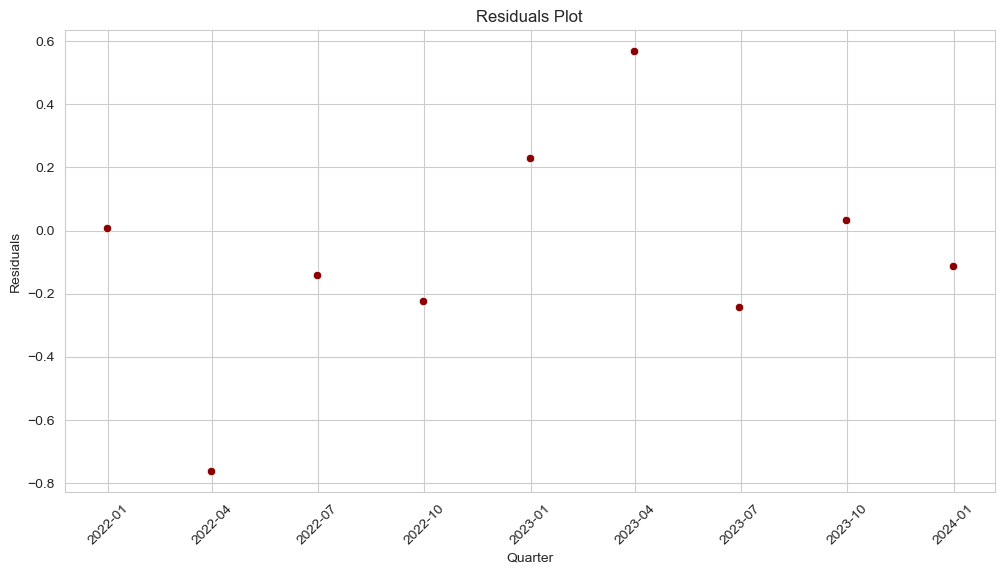

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# Independence: The residuals (errors) should be independent of each other.
# Lets test the independence of the residuals

residuals = np.array(ytrues) - np.array(ypredicts)

plt.figure(figsize=(12, 6))
# using sns to plot the residuals against the index (quarters)
sns.scatterplot(x=apple_df.index[-len(residuals):], y=residuals, color = "darkred")
plt.title("Residuals Plot")
plt.xlabel("Quarter")
plt.ylabel("Residuals")
plt.xticks(rotation=45)
plt.show()

The scatterplot for the residuals seems to show to inherent pattern, confirming that the residuals are independent. However, this observation might be wrong because we have very few data points (quarters). Lets make use of Durbin-Watson Test. This test detects the presence of autocorrelation in residuals. Values close to 2 indicate no autocorrelation.

In [115]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")


Durbin-Watson Statistic: 1.873106698210021


This is inline with our observation from the plot that residuals are independent. Now, we will move on to test the Homoscedasticity, which requires that the residuals should have constant variance at every level of the independent variables.

We will plot a Residuals vs Predicted Values Plot. It plots the residuals on the y-axis and the predicted values on the x-axis. A random scatter without a funnel-shaped or patterned spread indicates homoscedasticity.

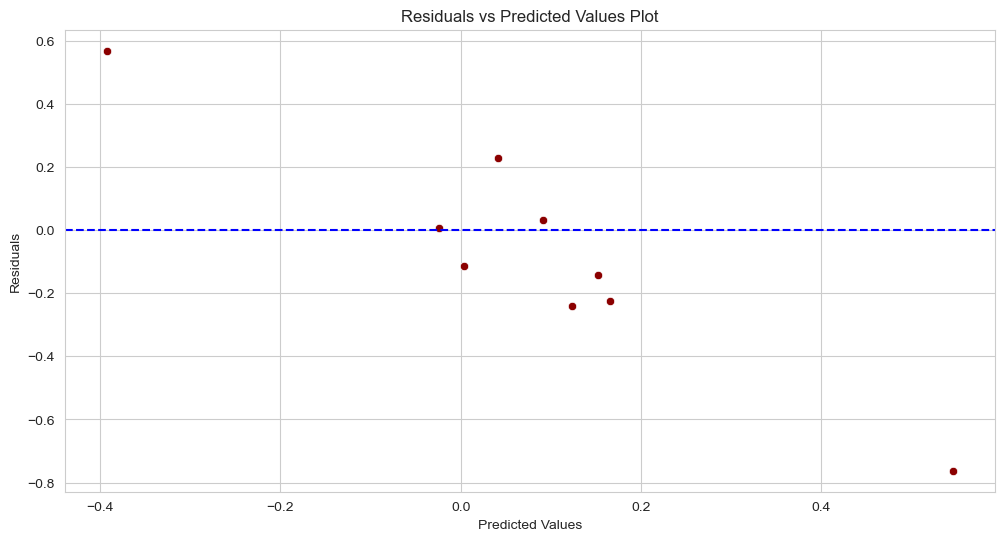

In [116]:
# We will plot a Residuals vs Predicted Values Plot. It plots the residuals on the y-axis and the predicted values on the x-axis.

plt.figure(figsize=(12, 6))
sns.scatterplot(x=ypredicts, y=residuals, color = "darkred")
plt.title("Residuals vs Predicted Values Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='blue', linestyle='--')
plt.show()

Again, we have a problem of interpretability due to very few data points but the plot it seems that there is not Homoscedasticity!

Next step: Let's see the normality of the residuals using a qqplot. Disclaimer: there will be interpreatibility issues due to less data points!

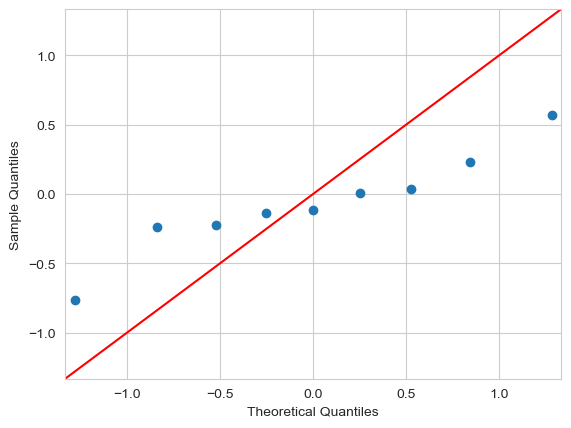

In [117]:
import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.show()

From the QQ plot, we can see that the residuals are not normally distributed. But this may be due to the small sample size.

We will now focus on the 5th assumption: No high multicollinearity among independent variables. We will detect this using correlation matrix and plotting it as a heatmap!

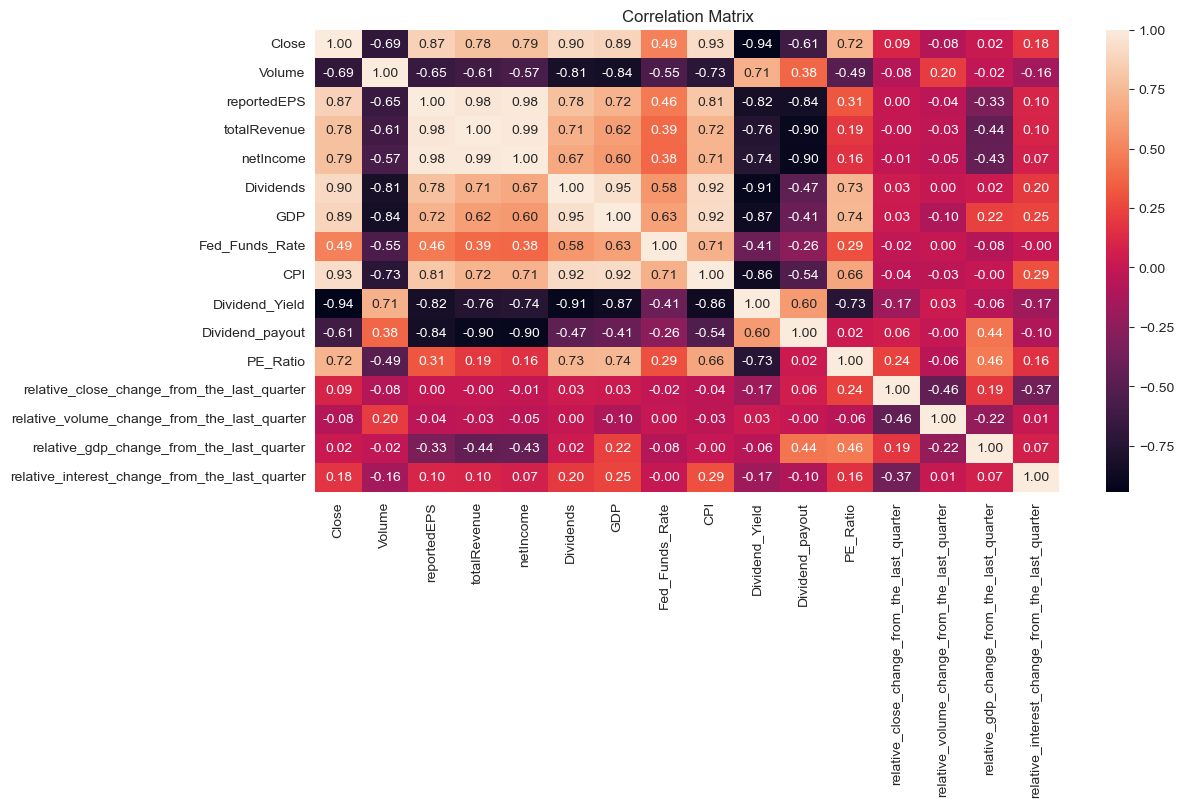

In [118]:
X = apple_df.drop(columns=["relative_close_change_for_next_quarter"])
correlation_matrix = X.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The heatmap shows that some variables/predictors/features are overly correlated. This can lead to multicollinearity which can affect the model's performance. We will not delete them immediately but rather perform regularization (a bit later).

For now, lets plot the coefficients of our model for each predictor variable and try to make sense of it!

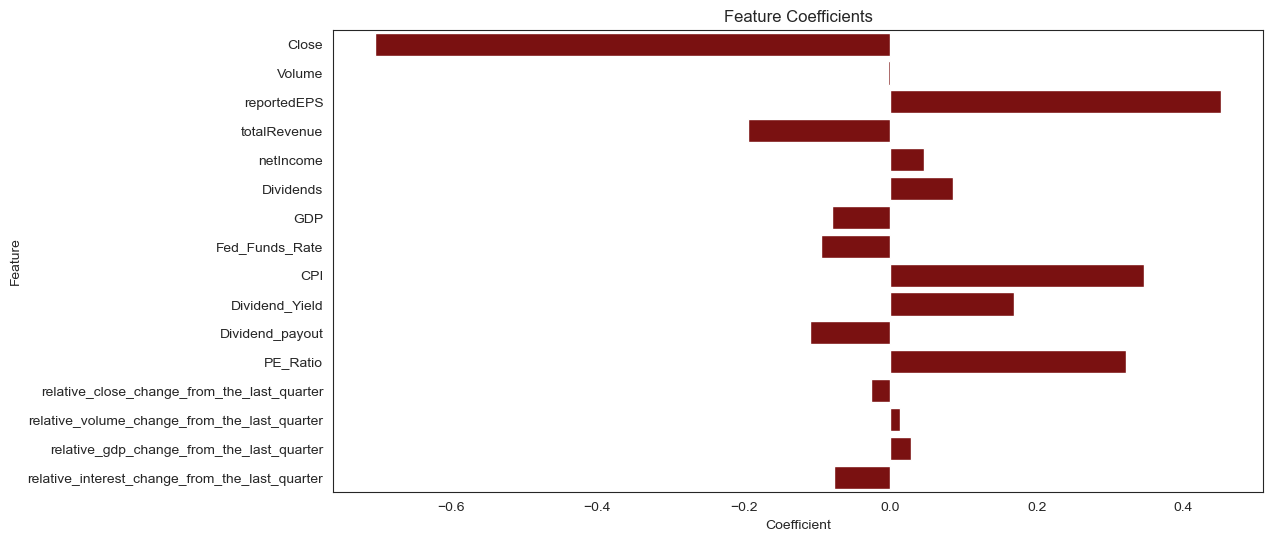

In [119]:
# lets plot the models coefficients
coefficients = model.coef_
features = training_set.drop(columns=["relative_close_change_for_next_quarter"]).columns

sns.set_style("white")
plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients, y=features, color = "darkred")
plt.title("Feature Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

The results are astonishingly disturbing. Our simply linear regression model is unable to detect the relation between the variables correctly - and rather, in the race to minimise the MSE, giving us cofficients which contradict reality. **For example, Close price for last quarter, total Revenue, GDP, and stock Volume must positively affect the predictions**. But this is not captured by our model and thus we, as an investor, can not rely on this model.

---

Lets give Linear Regression another try. So far, we have not performed feature selection and neither did we perform any regularization for the Linear Regression model. Lets perform both and see if the model improves. Our approach will be not to perform feature selection using wrapper or filter methods, for we already have a handful of features and each of them are important.   

However, We will use Elastic Regression, which incorporates both Lasso (Least Absolute Shrinkage and Selection Operator) regression for feature selection and Ridge Regression for regularization - combined as Elastic Net Regression.

In [139]:
from sklearn.linear_model import ElasticNet

# Initialize the model
model = ElasticNet(alpha=0.03, l1_ratio=0.5)
# alpha (set at .1) is the regularization strength and l1_ratio is the ratio of L1 regularization to L2 regularization.

# Initialize lists to store metrics
ytrues, ypredicts, rmse, mae = [], [], [], []

# Separate training and testing sets. We will consider the data from 2014 to 2021 as the training set and the data from 2022 to 2023 as the testing set.
training_set = apple_df[apple_df.index < "2021-12-31"]
testing_set = apple_df[apple_df.index >= "2021-12-31"]

# Function to train, predict, and evaluate
def train_and_evaluate(model, train_data, test_data):

    X_train = train_data.drop(columns=["relative_close_change_for_next_quarter"])
    y_train = train_data["relative_close_change_for_next_quarter"]
    X_test = test_data.drop(columns=["relative_close_change_for_next_quarter"])
    y_test = test_data["relative_close_change_for_next_quarter"]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict for the first quarter in the test set
    y_pred = model.predict(X_test.iloc[[0]])
    y_true = y_test.iloc[[0]] # Get the true value for the first quarter in the test set
    ypredicts.append(y_pred[0]) # Store the predicted value for accuracy calculation and r2 score
    ytrues.append(y_true.values[0]) # Store the true value for accuracy calculation and r2 score
    
    # Calculate metrics
    return (
        mean_squared_error(y_true, y_pred),
        mean_absolute_error(y_true, y_pred),
    )

# Rolling training and evaluation
while not testing_set.empty:
    # Train and evaluate for the current step
    rmse_val, mae_val = train_and_evaluate(model, training_set, testing_set)
    
    # Store metrics
    rmse.append(rmse_val)
    mae.append(mae_val)
    
    # Update training and testing sets
    training_set = pd.concat([training_set, testing_set.head(1)])
    testing_set = testing_set.drop(testing_set.index[0])

accuracy = np.sum(np.sign(ytrues) == np.sign(ypredicts)) / len(ytrues)

# Display average metrics
print(f"Average RMSE: {round(sum(rmse) / len(rmse), 2)}")
print(f"Average MAE: {round(sum(mae) / len(mae), 2)}")
print("True values:", ytrues)
print("Predicted values:", ypredicts)
print(f"R2 Score: {r2_score(ytrues, ypredicts):.2f}")
print(f"Accuracy: {round(accuracy, 2)}")

Average RMSE: 0.04
Average MAE: 0.16
True values: [-0.0166695195797487, -0.2169978767378927, 0.0108250125389477, -0.0598408426561555, 0.269144948756866, 0.1762887107349888, -0.1173377035809735, 0.124525385371081, -0.1093336268904675]
Predicted values: [0.06448169172074537, 0.14084513509592625, -0.1390670149428927, 0.021829317271786004, 0.037813067076507834, 0.023625082214489876, 0.10804245816465506, 0.08190290515093891, 0.04694203321263472]
R2 Score: -0.63
Accuracy: 0.33


Clearly, the MAE has decreased by the Accuracy is even worse now and we are below the benchmark level of the naive random walk model!

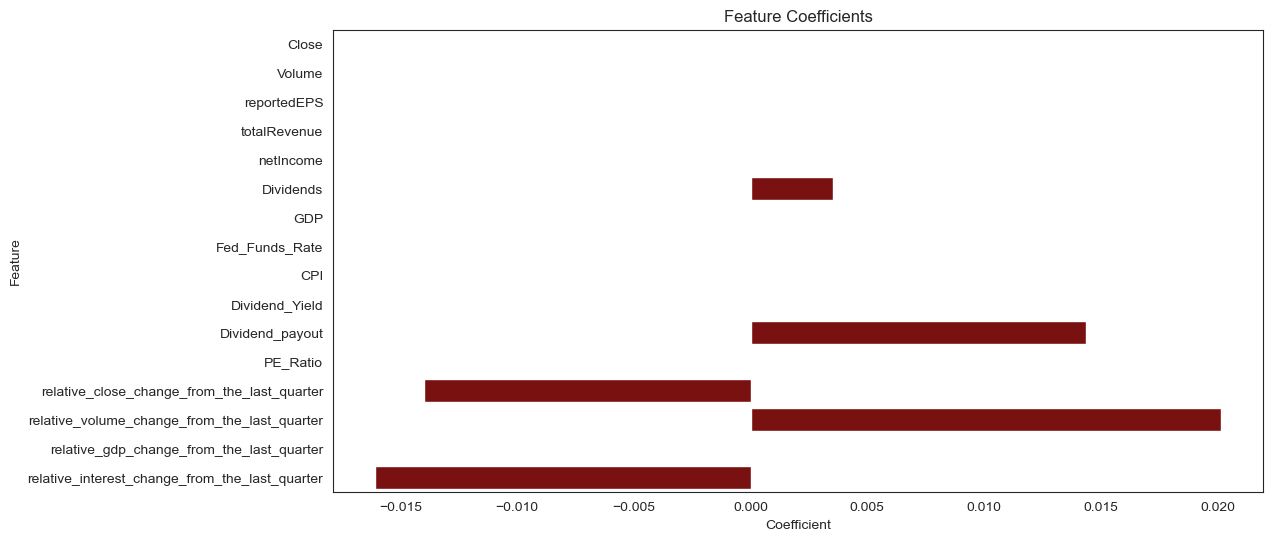

In [143]:
# lets plot the models coefficients
coefficients = model.coef_
features = training_set.drop(columns=["relative_close_change_for_next_quarter"]).columns

plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients, y=features, color = "darkred")
plt.title("Feature Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

The results are again not so welcoming. Our regularised linear regression model is unable to detect the relation between the variables correctly - and rather, in the race to minimise the MSE zeroing out some of the most crucial features.

This model is not well adapted to our problem because it can't capture the trends and time series data well!

---

### Logistic Regression

In [275]:
apple_df["Should_buy_next"] = apple_df["relative_change_for_next_quarter"].apply(lambda x: 1 if x > 0 else 0)

Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      0.83      0.77         6

    accuracy                           0.62         8
   macro avg       0.36      0.42      0.38         8
weighted avg       0.54      0.62      0.58         8



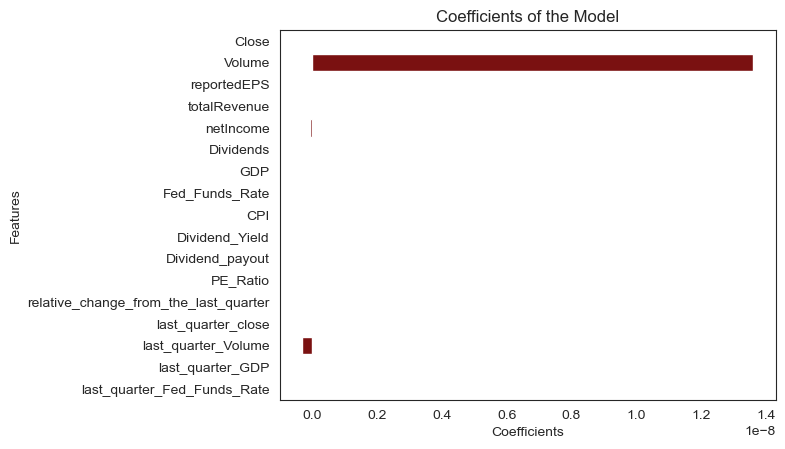

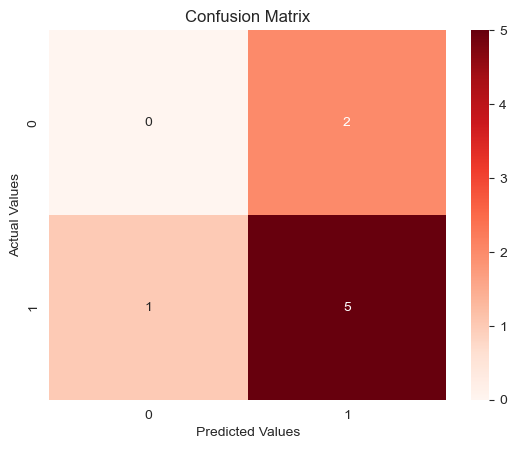

In [276]:
# We are interested in predicting 'Should_buy_next', which is 1 if one should buy the stock for next quarter because it will increase in value or 0 if it will decrease using the 'Close','Volume','reportedEPS',
# 'totalRevenue','netIncome','Dividends','GDP','Fed_Funds_Rate','CPI','Dividend_Yield','Dividend_payout', and 'PE_Ratio' for the current 
# quarter and 'relative_change_from_the_last_quarter','last_quarter_close','last_quarter_Volume','last_quarter_GDP','last_quarter_Fed_Funds_Rate'
# for the last quarter.

# Our first use will be Logistic Regression Model. 

# List of features:

features = ['Close', 'Volume', 'reportedEPS', 'totalRevenue', 'netIncome', 'Dividends', 'GDP', 'Fed_Funds_Rate', 'CPI', 'Dividend_Yield', 'Dividend_payout', 'PE_Ratio', 'relative_change_from_the_last_quarter', 'last_quarter_close', 'last_quarter_Volume', 'last_quarter_GDP', 'last_quarter_Fed_Funds_Rate']
target = 'Should_buy_next'

X = apple_df[features]
y = apple_df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Let's plot the coefficients of the model:

coefficients = model.coef_[0]
features = X.columns

plt.figure()
sns.set_style("white")

sns.barplot(x = coefficients, y = features, color = "darkred")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.title("Coefficients of the Model")
plt.show()

# Let's plot the confusion matrix:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.set_style("white")
sns.heatmap(cm, annot = True, cmap = "Reds", fmt = "d")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")
plt.show()


# Arima

<Figure size 1000x600 with 0 Axes>

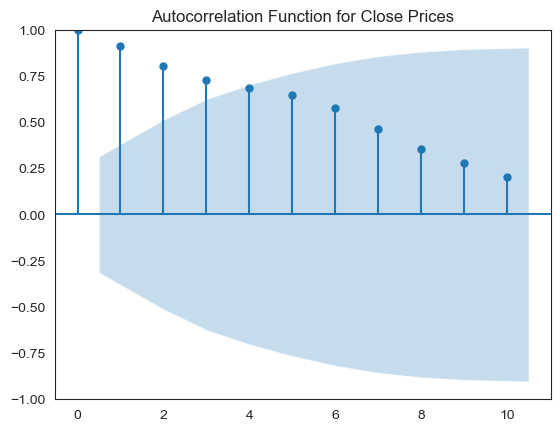

<Figure size 1000x600 with 0 Axes>

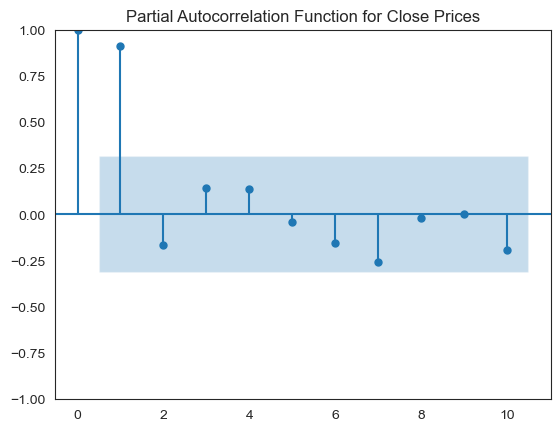

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming `apple_df['close']` is your target variable
target_variable = apple_df['Close']

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(target_variable, lags=10, title='Autocorrelation Function for Close Prices')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(target_variable, lags=10, title='Partial Autocorrelation Function for Close Prices')
plt.show()


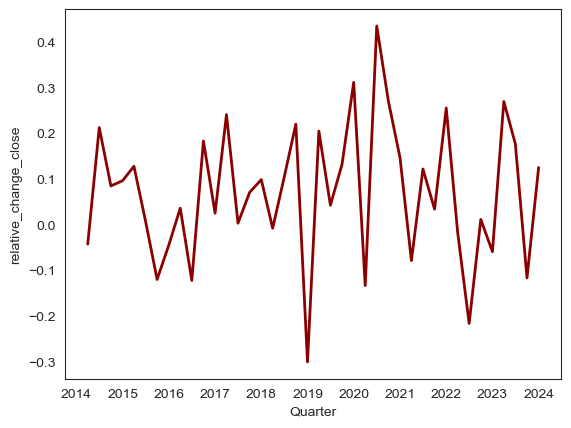

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the relative_change across time:

plt.figure()
sns.set_style("white")
# Change 'lwd' to 'linewidth'
sns.lineplot(data = apple_df, x = apple_df.index, y = "relative_change_close", linewidth = 2, color = "darkred")
plt.show()

# LSTM